# Regularized Linear Regression

In the first half of the exercise, you will implement regularized linear regression
to predict the amount of water flowing out of a dam using the change
of water level in a reservoir. In the next half, you will go through some diagnostics
of debugging learning algorithms and examine the effects of bias v.s.
variance.

## 1.1 - Visualizing the dataset

The data set is split into three parts:

- A **training** set `X` and `y`
- A **cross** validation set `Xval` and `yval`
- A **test** set `Xtest` and `ytest`

Loading and Visualizing Data ...


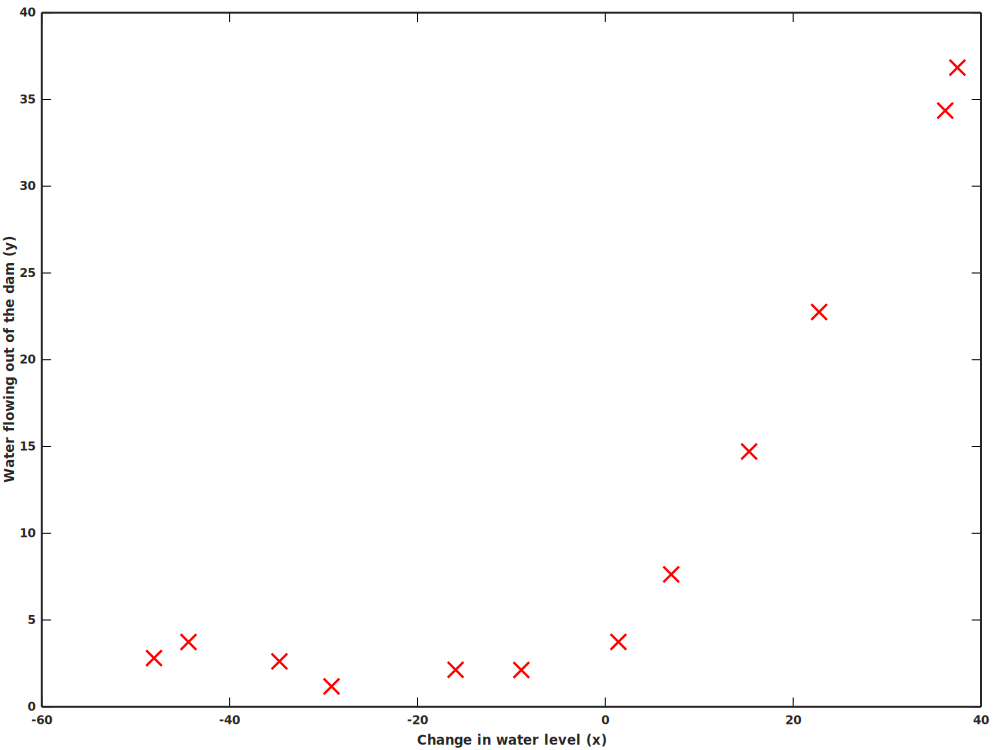

In [1]:
%plot -f svg -w 1000
fprintf('Loading and Visualizing Data ...\n')

% Load from ex5data1: 
% You will have X, y, Xval, yval, Xtest, ytest in your environment
addpath('includes/ex5');
load('ex5data1.mat');

% m = Number of examples
m = size(X, 1);

% Plot training data
plot(X, y, 'rx', 'MarkerSize', 7);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');

## 1.2 - Regularized linera regression cost function

Regularized linear regression has the following cost function:

$$
\begin{align*}
J(\theta) = \frac{1}{2m}\left(\sum^m_{i=1}\left(h_\theta\left(x^{(i)}\right)-y^{(i)}\right)^2\right) + \frac{\lambda}{2m}\left(\sum^n_{j=1}\theta^2_j\right)
\end{align*}
$$

In [2]:
function [J grad] = linearRegCostFunction(X, y, theta, lambda)
    m = length(y);
    hypothesis = X*theta;

    J = 1/(2*m) * sum((hypothesis-y).^2) + lambda / (2 * m) * sum(theta(2:end).^2);
endfunction

In [3]:
theta = [1 ; 1];
J = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Cost at theta = [1 ; 1]: %f '...
         '\n(this value should be about 303.993192)\n'], J);

Cost at theta = [1 ; 1]: 303.993192 
(this value should be about 303.993192)


## 1.4 - Regularized linear regression gradient

$$
\begin{align*}
\frac{\partial}{\partial\theta_0}J(\theta)&=\frac{1}{m}\sum^m_{i=1}\left(h_\theta\left(x^{(i)}\right)-y^{(i)}\right) &\mbox{for } j=0\\
\frac{\partial}{\partial\theta_j}J(\theta)&=\frac{1}{m}\left(\sum^m_{i=1}\left(h_\theta\left(x^{(i)}\right)-y^{(i)}\right)x^{(i)}_j\right) + \frac{\lambda}{m}\theta_j &\mbox{for } j\geq1\\
\end{align*}
$$

In [4]:
function [J grad] = linearRegCostFunction(X, y, theta, lambda)
    m = length(y);
    hypothesis = X*theta;

    J = 1/(2*m) * sum((hypothesis-y).^2) + lambda / (2 * m) * sum(theta(2:end).^2);
    
    grad = 1 / m * X' * (hypothesis-y) + lambda / m * [0; theta(2:end)];
endfunction

In [5]:
theta = [1 ; 1];
[J, grad] = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Gradient at theta = [1 ; 1]:  [%f; %f] '...
         '\n(this value should be about [-15.303016; 598.250744])\n'], ...
         grad(1), grad(2));

Gradient at theta = [1 ; 1]:  [-15.303016; 598.250744] 
(this value should be about [-15.303016; 598.250744])


## 1.4 - Fitting linear regression

Iteration     2 | Cost: 2.237391e+01


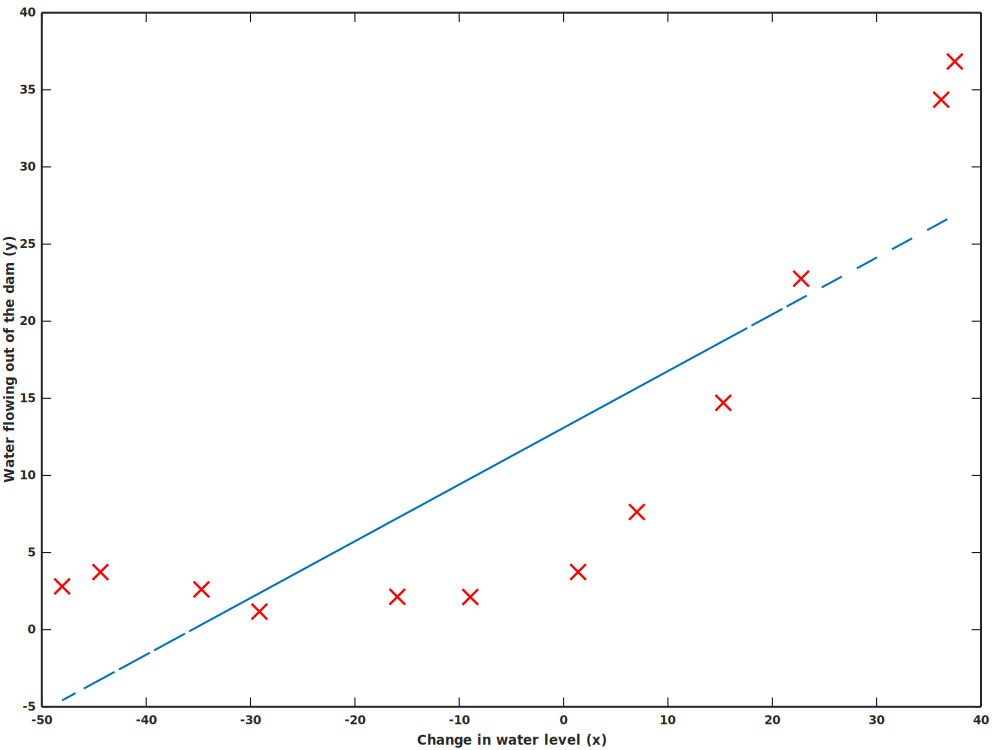

In [6]:
%  Train linear regression with lambda = 0
lambda = 0;
[theta] = trainLinearReg([ones(m, 1) X], y, lambda);

%  Plot fit over the data
plot(X, y, 'rx', 'MarkerSize', 7);
axis([-50 40 -5 40]);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
hold on;
plot(X, [ones(m, 1) X]*theta, '--', 'LineWidth', 2)
hold off;

# 2 - Bias-variance

## 2.1 - Learning curves

In [7]:
function [error_train, error_val] = learningCurve(X, y, Xval, yval, lambda)
    % Number of training examples
    m = size(X, 1);

    % You need to return these values correctly
    error_train = zeros(m, 1);
    error_val   = zeros(m, 1);

    for i = 1:m
        [theta] = trainLinearReg(X(1:i, :), y(1:i, :), lambda);
        error_train(i) = linearRegCostFunction(X(1:i, :), y(1:i, :), theta, 0)(1, 1);
        error_val(i) = linearRegCostFunction(Xval, yval, theta, 0)(1, 1);
    end
endfunction

Iteration     3 | Cost: 0.000000e+00
Iteration     3 | Cost: 9.860761e-32
Iteration     8 | Cost: 3.286595e+00
Iteration    13 | Cost: 2.842678e+00
Iteration    25 | Cost: 1.315405e+01
Iteration    36 | Cost: 1.944396e+01
Iteration    15 | Cost: 2.009852e+01
Iteration    18 | Cost: 1.817286e+01
Iteration     9 | Cost: 2.260941e+01
Iteration    16 | Cost: 2.326146e+01
Iteration    20 | Cost: 2.431725e+01
Iteration     2 | Cost: 2.237391e+01
# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	205.121096
  	2		0.000000	110.300366
  	3		3.286595	45.010231
  	4		2.842678	48.368911
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


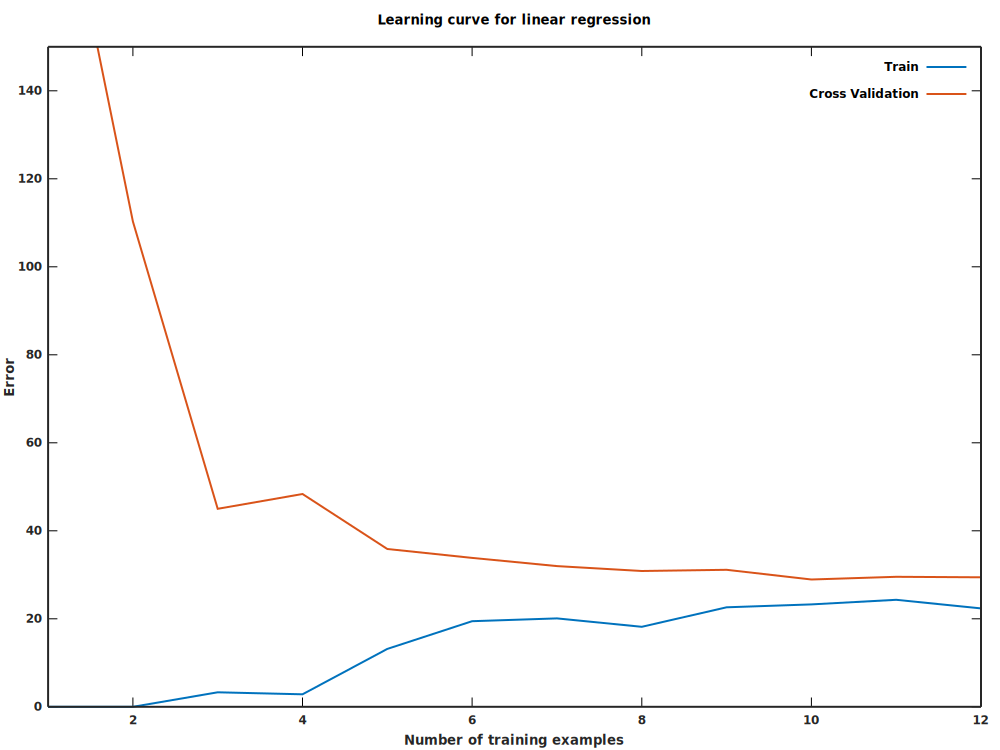

In [8]:
lambda = 0;
[error_train, error_val] = ...
    learningCurve([ones(m, 1) X], y, ...
                  [ones(size(Xval, 1), 1) Xval], yval, ...
                  lambda);

plot(1:m, error_train, 1:m, error_val);
title('Learning curve for linear regression')
legend('Train', 'Cross Validation')
legend left;
legend boxoff;
xlabel('Number of training examples')
ylabel('Error')
axis([1 12 0 150])

fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

# 3 - Polynomial regression

Because linear regression gives us a too simple hypothesis, which is unable to fit our data well, we start to add features. Our hypothesis looks like
$$
h_\theta(x)=\theta_0+\theta_1x_1+\theta_2(\mbox{waterLevel})^2+\theta_3(\mbox{waterLevel})^3+\cdots
$$

In [9]:
function [X_poly] = polyFeatures(X, p)
    % You need to return the following variables correctly.
    X_poly = zeros(numel(X), p);

    for power = 1:p
        X_poly(:, power) = X.^power;
    end
endfunction

In [10]:
p = 8;

% Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly);  % Normalize
X_poly = [ones(m, 1), X_poly];                   % Add Ones

% Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p);
X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = [ones(size(X_poly_test, 1), 1), X_poly_test];         % Add Ones

% Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p);
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(size(X_poly_val, 1), 1), X_poly_val];           % Add Ones

fprintf('Normalized Training Example 1:\n');
fprintf('  %f  \n', X_poly(1, :));

Normalized Training Example 1:
  1.000000  
  -0.362141  
  -0.755087  
  0.182226  
  -0.706190  
  0.306618  
  -0.590878  
  0.344516  
  -0.508481  


## 3.1 - Learning linear regression

Iteration   200 | Cost: 1.339803e-01


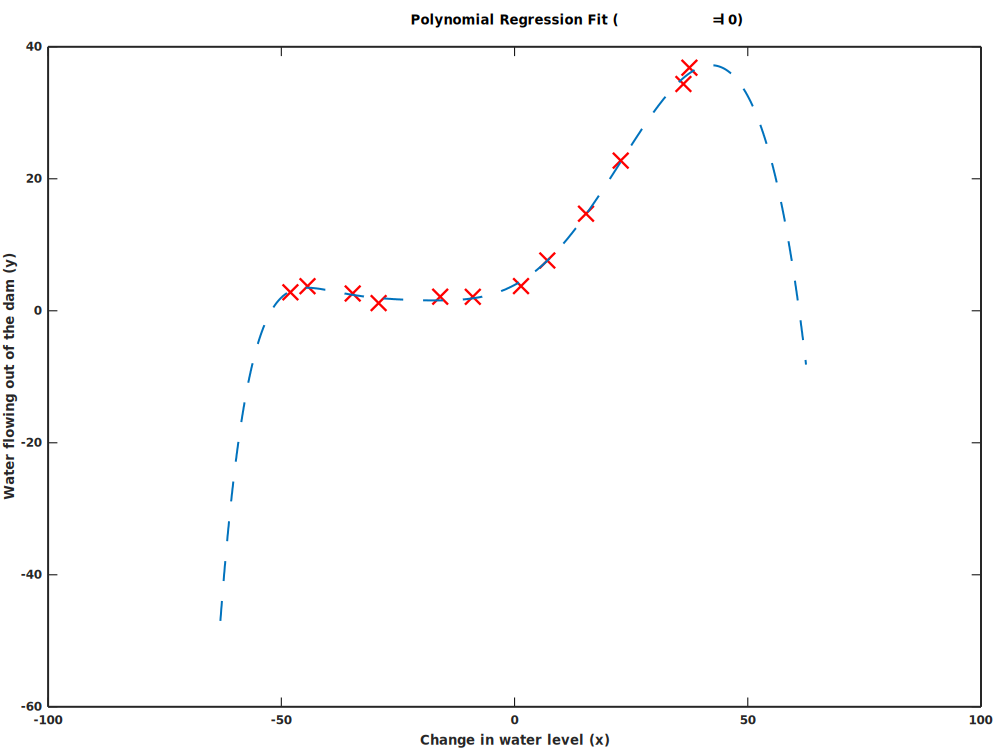

In [11]:
lambda = 0;
[theta] = trainLinearReg(X_poly, y, lambda);

% Plot training data and fit
figure(1);
plot(X, y, 'rx', 'MarkerSize', 7, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (\\lambda = %d)', lambda));

Iteration     2 | Cost: 0.000000e+00
Iteration    11 | Cost: 0.000000e+00
Iteration    26 | Cost: 1.643460e-31
Iteration    10 | Cost: 2.028605e-28
Iteration   200 | Cost: 1.203359e-08
Iteration   200 | Cost: 1.147755e-03
Iteration   200 | Cost: 2.119870e-02
Iteration   200 | Cost: 7.128497e-02
Iteration   200 | Cost: 1.457567e-01
Iteration   200 | Cost: 1.691206e-01
Iteration   200 | Cost: 1.014776e-01
Iteration   200 | Cost: 1.339803e-01


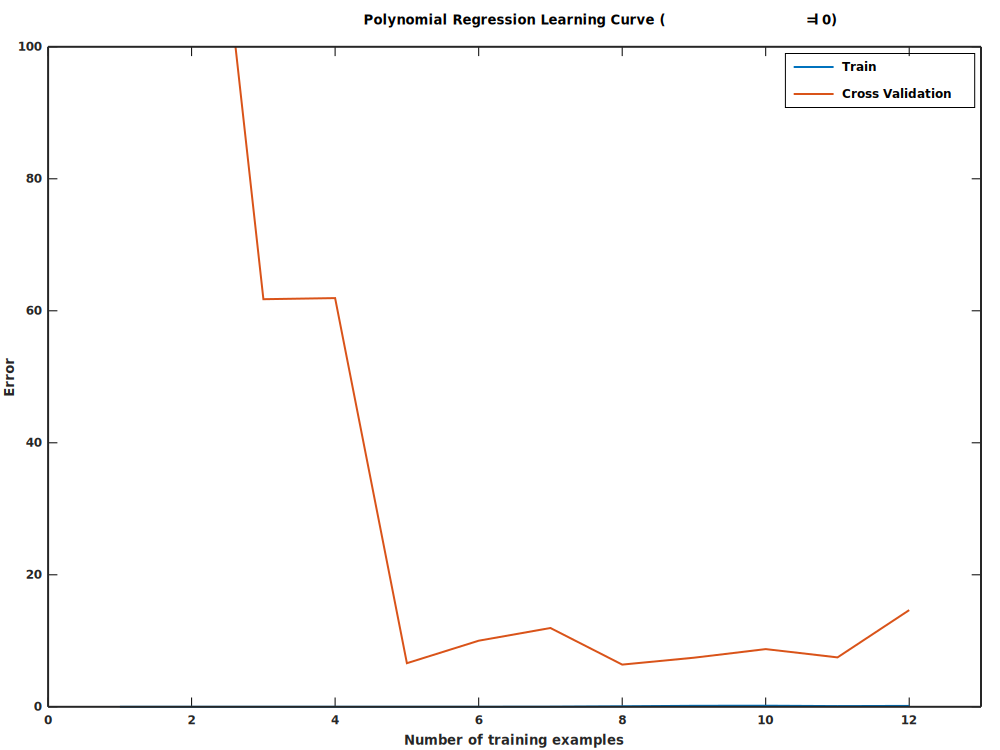

In [12]:
figure(2);
[error_train, error_val] = ...
    learningCurve(X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train, 1:m, error_val);

title(sprintf('Polynomial Regression Learning Curve (\\lambda = %d)', lambda));
xlabel('Number of training examples')
ylabel('Error')
legend boxoff left;
axis([0 13 0 100])
legend('Train', 'Cross Validation')


## 3.2 - Adjusting the regularization parameter

We try multiple values for $\alpha$

Iteration    68 | Cost: 7.268148e+00
Iteration    14 | Cost: 1.206934e-31
Iteration    21 | Cost: 7.269436e-02
Iteration    22 | Cost: 1.849879e+01
Iteration    41 | Cost: 1.457586e+01
Iteration    52 | Cost: 1.166072e+01
Iteration    55 | Cost: 1.011882e+01
Iteration    65 | Cost: 9.416317e+00
Iteration    62 | Cost: 8.256224e+00
Iteration    51 | Cost: 7.802076e+00
Iteration    68 | Cost: 7.064398e+00
Iteration    62 | Cost: 6.423784e+00
Iteration    68 | Cost: 7.268148e+00


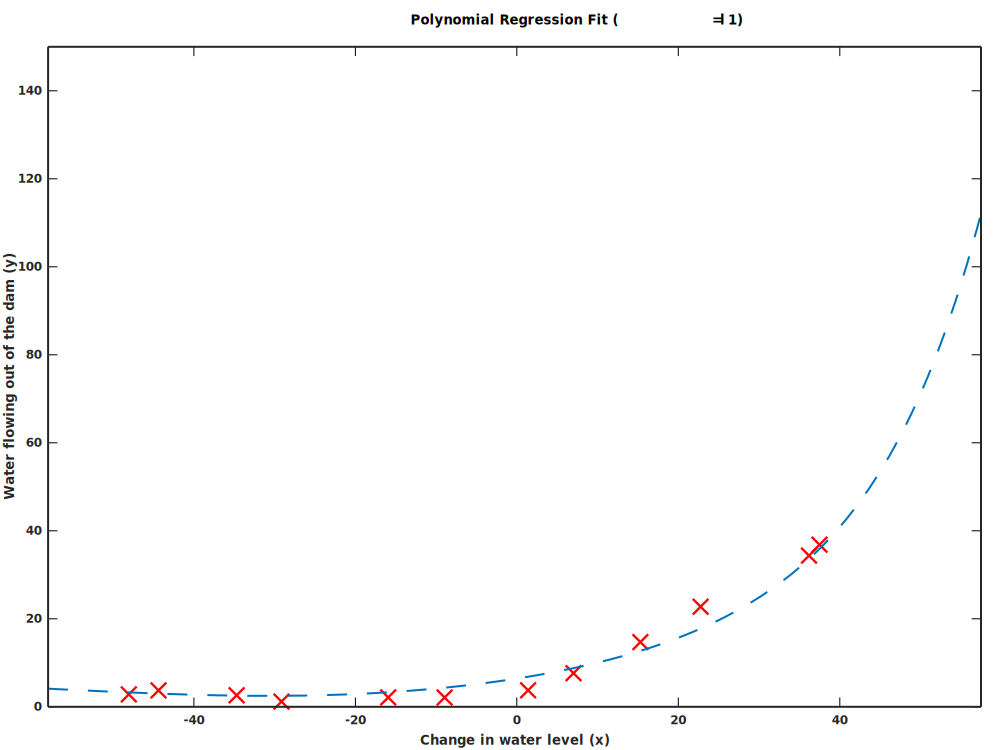

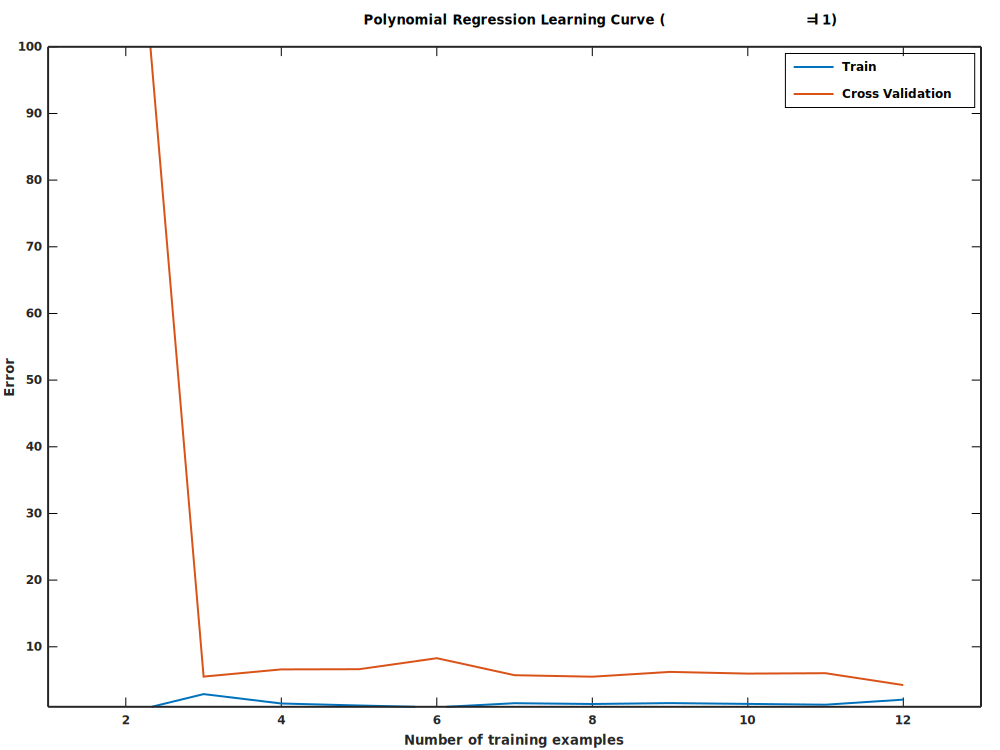

In [13]:
lambda = 1;
[theta] = trainLinearReg(X_poly, y, lambda);

figure(2);
[error_train, error_val] = learningCurve(X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train, 1:m, error_val);

title(sprintf('Polynomial Regression Learning Curve (\\lambda = %d)', lambda));
xlabel('Number of training examples')
ylabel('Error')
axis([1 13 1 100])
legend('Train', 'Cross Validation')

% Plot training data and fit
figure(1);
plot(X, y, 'rx', 'MarkerSize', 7, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
axis([min(X)-10 max(X)+20 0 150])
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (\\lambda = %d)', lambda));

Iteration    33 | Cost: 6.673316e+01


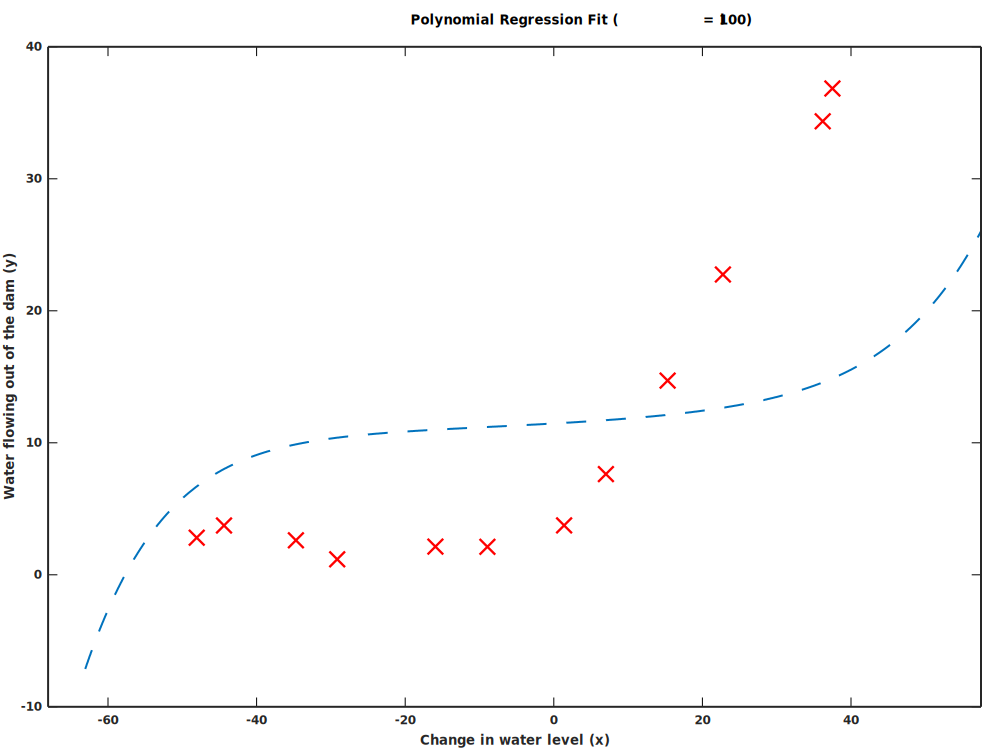

In [14]:
lambda = 100;
[theta] = trainLinearReg(X_poly, y, lambda);

% Plot training data and fit
figure(1);
plot(X, y, 'rx', 'MarkerSize', 7, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
axis([min(X)-20 max(X)+20 -10 40])
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (\\lambda = %d)', lambda));

## 3.3 - Selecting $\lambda$ using a cross validation set

In [15]:
function [lambda_vec, error_train, error_val] = validationCurve(X, y, Xval, yval)
    % Selected values of lambda
    lambda_vec = [0 0.001 0.003 0.01 0.03 0.1 0.3 1 3 10]';

    % You need to return these variables correctly.
    error_train = zeros(length(lambda_vec), 1);
    error_val = zeros(length(lambda_vec), 1);

    for i = 1:length(lambda_vec)
        lambda = lambda_vec(i);
        [theta] = trainLinearReg(X, y, lambda);
        error_train(i) = linearRegCostFunction(X, y, theta, 0)(1, 1);
        error_val(i) = linearRegCostFunction(Xval, yval, theta, 0)(1, 1);
    end
endfunction

Iteration   200 | Cost: 1.339803e-01
Iteration   200 | Cost: 1.749256e-01
Iteration   200 | Cost: 2.574605e-01
Iteration   200 | Cost: 3.850633e-01
Iteration   200 | Cost: 6.692749e-01
Iteration   162 | Cost: 1.443470e+00
Iteration   108 | Cost: 3.101591e+00
Iteration    68 | Cost: 7.268148e+00
Iteration    31 | Cost: 1.586769e+01
Iteration    29 | Cost: 3.337220e+01


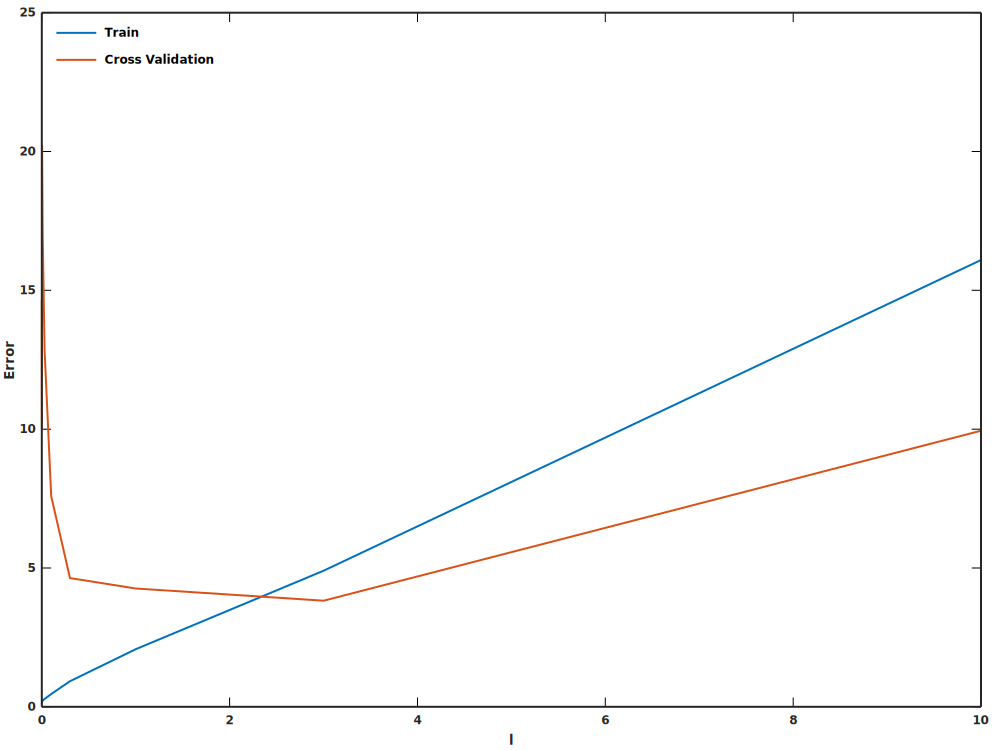

In [16]:
[lambda_vec, error_train, error_val] = validationCurve(X_poly, y, X_poly_val, yval);

plot(lambda_vec, error_train, lambda_vec, error_val);
legend('Train', 'Cross Validation');
legend location northwest;
legend boxoff;
xlabel('\lambda');
ylabel('Error');